Name: Kieran Fitzmaurice

# Error Function

(Adapted from textbook exercise 5.3)

The [error function](https://en.wikipedia.org/wiki/Error_function) is defined by the integral
$$\mathrm{erf}(x) = \frac{2}{\sqrt{\pi}}\int_0^x e^{-t^2} \,dt.$$

Write a function to calculate $\mathrm{erf}(x)$ by evaluating this integral. Use any of the integration methods that we've discussed this week. Graph the result from $x=0$ to $x=3$. You can check your code by comparing your result to `scipy.special.erf`.

(Note that there is no known way to perform this particular integral analytically, so numerical approaches are the only way forward.)

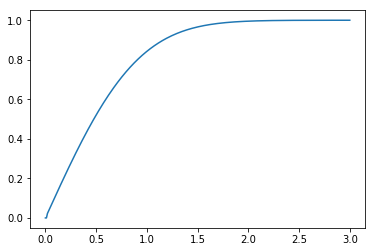

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.integrate as si

def erf(x):
    dt = 1/100
    t = np.linspace(0,x,int(x/dt))
    y = np.exp(-1*t**2)
    err = si.trapz(y,t) * (2/np.sqrt(np.pi))
    return(err)

x = np.linspace(0,3,300)
y = [erf(t) for t in x]
    
plt.plot(x,y)
plt.show()



# Diffraction Limit of a Telescope

(Adapted from textbook exercise 5.4)

Our ability to resolve detail in astronomical observations is limited by the diffraction of light in our telescopes. Light from stars can be treated effectively as coming from a point source at infinity. When
such light, with wavelength $\lambda$, passes through the circular aperture of a telescope (which we'll assume to have unit radius) and is focused by the telescope in the focal plane, it produces not a single dot, but a
circular diffraction pattern consisting of central spot surrounded by a series of concentric rings. The intensity of the light in this diffraction pattern is given by
$$I(r) = \biggl( \frac{J_1(kr)}{kr} \biggr)^2\,,$$
where $r$ is the distance in the focal plane from the center of the diffraction pattern, $k=2\pi/\lambda$, and $J_1(x)$ is a Bessel function.

The Bessel functions $J_m(x)$ are given by
$$J_m(x) = \frac{1}{\pi} \int_0^\pi \cos(m\theta - x\sin\theta) \,d\theta\,,$$
where $m$ is a nonnegative integer and $x\ge0$.

Write a Python function `J(m,x)` that calculates the value of $J_m(x)$ using Simpson's rule with $N=1000$ points.  Use your function in a program to make a plot, on a single graph, of the Bessel functions $J_0$, $J_1$, and $J_2$ as a function of $x$ from $x=0$ to $x=20$. You can check your code by comparing the result to `scipy.special.jv`.

In [2]:
%reset -f

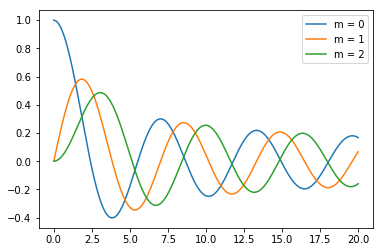

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.integrate as si
from math import ceil

def J(m,x):
    N = 1000
    theta = np.linspace(0,np.pi,N)
    y = np.cos(m*theta - x*np.sin(theta))
    j = si.simps(y,dx = np.pi/N, axis = 0) * (1/np.pi)
    return(j)

x = np.linspace(0,20,1000)
J0 = [J(0,xx) for xx in x]
J1 = [J(1,xx) for xx in x]
J2 = [J(2,xx) for xx in x]

plt.plot(x,J0, label = "m = 0")
plt.plot(x,J1, label = "m = 1")
plt.plot(x,J2, label = "m = 2")
plt.legend()
plt.show()


Next, make a density plot of the intensity of the circular diffraction pattern of a point light source with $\lambda=500$ nm, in a square region of the focal plane, using the formula given above. Your picture should cover values of $r$ from zero up to about $1\,\mu$m.

>Hint 1: You may find it useful to know that
$$\lim_{x \to 0} \frac{J_1(x)}{x} = \frac{1}{2}\,.$$

>Hint 2: The central spot in the diffraction pattern is so bright that it may be difficult to see the rings around it on the computer screen. Setting `vmax=0.01` in your call to `imshow` will avoid this issue.

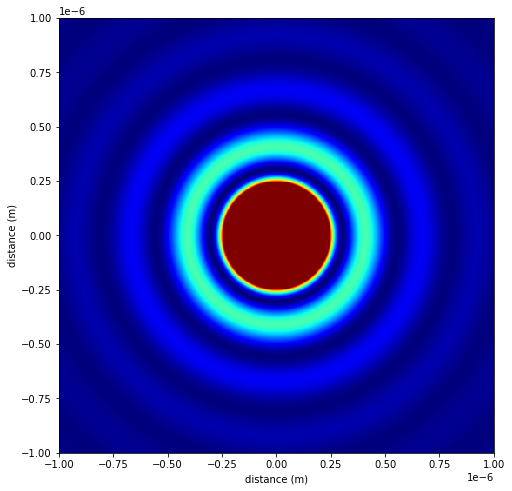

In [4]:
lam = 500e-9
rmin = 0
rmax = 1e-6

k = 2*np.pi/lam

n = 250

x = np.linspace(rmin,rmax,n)
y = np.linspace(rmin,rmax,n)

xx,yy = np.meshgrid(x,y)

r = np.sqrt(xx**2 + yy**2)

I1 = np.zeros((n,n))
I1[0][0] = 0.5
for i in range(1,n):
    I1[i][0] = (J(1,k*r[i][0])/(k*r[i][0]))**2
    I1[0][i] = (J(1,k*r[0][i])/(k*r[0][i]))**2
    for j in range(1,n):
        I1[i][j] = (J(1,k*r[i][j])/(k*r[i][j]))**2
        
I2 = np.flip(I1,0)

IR = np.concatenate((I2,I1),0)
IL = np.flip(IR,1)
I = np.concatenate((IL,IR),1)

plt.figure(figsize = (8,8))
plt.imshow(I,cmap = "jet",vmax = 0.01,extent = (-1*rmax,rmax,-1*rmax,rmax))
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.xlabel("distance (m)")
plt.ylabel("distance (m)")

plt.show()


# Estimating Error

(Adapted from textbook exercises 5.5 and 5.6)

Write a program to calculate the value of the integral
$$\int_0^2 (x^4 - 2x + 1) \,dx$$
using the trapezoidal rule with $20$ slices, but this time have the program also print an estimate of the error on the result, calculated by evaluating the integral twice, once with $N_1=10$ slices and then again with $N_2=20$ slices. Then, the error is
$$\epsilon_2 = \tfrac13(I_2-I_1)\,.$$

In [5]:
%reset -f

In [6]:
import numpy as np
import scipy.integrate as si

def func(x):
    y = x**4 - 2*x + 1
    return(y)

def trapz_error(f,a,b,n1,n2):
    x1 = np.linspace(a,b,n1)
    x2 = np.linspace(a,b,n2)
    y1 = f(x1)
    y2 = f(x2)
    
    I1 = si.trapz(y1,x1)
    I2 = si.trapz(y2,x2)
    
    e2 = (1/3)*(I2 - I1)
    return(e2)

e2_calc = trapz_error(func,0,2,10,20)

x = np.linspace(0,2,20)
I2 = np.trapz(func(x),x)

e2_exact = 4.4 - I2

print("e2 (calculated) = %lf" % e2_calc)
print("e2 (exact) = %lf" % e2_exact)
    

e2 (calculated) = -0.033995
e2 (exact) = -0.029539


How does the error calculated in this manner compare with a direct computation of the error as the difference between your value for the integral and the true value of 4.4?  Why do the two not agree perfectly?

Type your answer here:

The two do not agree perfectly because in order to derive the expression for the error e2, one ignores the higher order error terms in the taylor expansion. 

Repeat the error estimate using Simpson's rule instead, where the error is
$$\epsilon_2 = \tfrac{1}{15}(I_2-I_1)\,.$$

In [7]:
def simps_error(f,a,b,n1,n2):
    x1 = np.linspace(a,b,n1)
    x2 = np.linspace(a,b,n2)
    y1 = f(x1)
    y2 = f(x2)
    
    I1 = si.simps(y1,x1)
    I2 = si.simps(y2,x2)
    
    e2 = (1/15)*(I2 - I1)
    return(e2)

e2_trapz = trapz_error(func,0,2,10,20)
e2_simps = simps_error(func,0,2,10,20)


print("e2 (trapezoid) = %lf \ne2 (simpson's) = %lf" %(e2_trapz,e2_simps))
print("e2 (simpson's) = %lf e2 (trapezoid)" % (e2_simps/e2_trapz))



e2 (trapezoid) = -0.033995 
e2 (simpson's) = -0.001200
e2 (simpson's) = 0.035309 e2 (trapezoid)


Is the error using Simpson's rule $\tfrac15$ the error using the trapezoid rule? Explain.

Type your answer here: 

The error using simpson's rule isn't 1/5 the error using the trapezoid rule due to the fact that the terms I1 and I2 in the error expression are calculated differently for each method. For simpson's rule, where the error scales as N^-4, I1 and I2 are much closer to the true value than what one would get with the trapezoid rule, which means that I2 - I1 is likely much smaller for simpson's rule than for trapezoids.

# Adaptive Trapezoid vs. Romberg

(Adapted from textbook exercise 5.7)

Consider the integral
$$I = \int_0^1 \sin^2 \sqrt{100 x} \,dx\,.$$

Write a program that uses the adaptive trapezoidal rule method to calculate the value of this integral to an approximate accuracy of $\epsilon=10^{-6}$ (i.e., correct to six digits after the decimal point). Start with one single integration slice and work up from there to two, four, eight, and so forth. Have your program print out the number of slices, its estimate of the integral, and its estimate of the error on the integral, for each value of the number of slices $N$, until the target accuracy is reached. You should find the result is around $I=0.45$.

`scipy.integrate` doesn't have a method like this, so you're going to have to code it yourself.

In [8]:
%reset -f

In [9]:
import numpy as np
import scipy.integrate as si

def func(x):
    y = np.sin(np.sqrt(100*x))**2
    return(y)

def trapz_error(f,a,b,n1,n2):
    x1 = np.linspace(a,b,n1)
    x2 = np.linspace(a,b,n2)
    y1 = f(x1)
    y2 = f(x2)
    
    I1 = si.trapz(y1,x1)
    I2 = si.trapz(y2,x2)
    
    e2 = (1/3)*(I2 - I1)
    return(e2)

def adapt_trapz(f,a,b,eps):
    n = 2
    err = trapz_error(f,a,b,n,n*2)

    while abs(err) > eps:
        err = trapz_error(f,a,b,n,n*2)
        n = n*2
        
    x = np.linspace(a,b,n)
    y = f(x)
    I = si.trapz(y,x)
    
    return(I,n,err)

I,n,err = adapt_trapz(func,0,1,1e-6)

print("I = %e\nN = %d\nerror = %e" % (I,n,err))


I = 4.558321e-01
N = 4096
error = 4.745660e-07


Now modify your program to evaluate the same integral using the Romberg integration technique. Have your program print out a triangular table of values, of all the Romberg estimates of the integral. Calculate the error on your estimates using 
$$\epsilon_{i, m}= \frac{R_{i, m}-R_{i-1, m}}{4^m-1}\,,$$
where $i$ is the row and $m$ is the column of the triangular table of values $R_{i,m}$ (see section 5.4 of the textbook if this notation is unclear). Continue the calculation until you reach an accuracy of $\epsilon=10^{-6}$. 

You may can use `scipy.integrate.romberg` to check your code (it will even print out the triangular table of values if you pass `show=True`), but you should code the romberg integrator by hand this time. The point is for you to understand how this integrator works.

In [10]:
def func(x):
    y = np.sin(np.sqrt(100*x))**2
    return(y)

def romb_order(f,a,b,N,base): #Creates table for Ri of order N, starting from base number of slices
    
    E = np.zeros((N,N))
    R = np.zeros((N,N))
    
    x1 = np.linspace(a,b,base)
    y1 = f(x1)
    
    I1 = si.trapz(y1,x1)

    R[0][0] = I1
    
    for i in range(1,N):
        x = np.linspace(a,b,base*2**i)
        y = f(x)
        R[i][0] = si.trapz(y,x)
        E[i][0] = (1/3)*(R[i][0] - R[i-1][0])
        for m in range(1,i):
            R[i][m] = R[i][m-1] + E[i][m-1]
            E[i][m] = (R[i][m] - R[i-1][m])/(4**m - 1)
            
    return(R,E)

def adapt_romb(f,a,b,eps):
    N = 2
    base = 1
    R,E = romb_order(f,a,b,N,base)
    err = E[N-1][N-2]
    
    while abs(err) > eps:
        N = N+1
        R,E = romb_order(f,a,b,N,base)
        err = E[N-1][N-2]
        
    print("ROMBERG:\n")
    print("I = %e\nError = %e\nOrder = %d\n" % (R[N-1][N-2],E[N-1][N-2],N))
    print("\nTable of Values:")
    
    for i in range(0,N-1):
        print("\n")
        for j in range(0,i):
            print(R[i][j]," ",end = "")
            


adapt_romb(func,0,1,1e-6)

ROMBERG:

I = 4.558325e-01
Error = 4.347162e-07
Order = 12


Table of Values:




0.147979484547  

0.430797571839  0.525070267604  

0.406758854275  0.39874594842  0.356637842025  

0.427338980606  0.434199022716  0.446016714148  0.451975305623  

0.447952348825  0.454823471565  0.461698287848  0.462743726095  0.462914653404  

0.453852232704  0.455818860664  0.45615065703  0.455780814976  0.455670292577  0.455641883319  

0.455340874033  0.45583708781  0.455843163525  0.455822663958  0.455823328228  0.455823928367  0.45582410632  

0.455710314167  0.455833460879  0.455832251902  0.45583152446  0.455831665103  0.455831697797  0.455831705392  0.455831707247  

0.455802080838  0.455832669728  0.455832406011  0.455832416285  0.455832430441  0.455832433442  0.455832434161  0.455832434339  0.455832434384  

0.455824933299  0.455832550785  0.455832511138  0.455832518146  0.455832519763  0.455832520113  0.455832520198  0.455832520219  0.455832520224  0.455832520226  